<span style="font-size:25px; font-weight:bold">FBI Time Series Forecasting </span>



<span style="font-size:15px"><strong>Project Type</strong> - EDA and Regression</span>



<span style="font-size:25px; font-weight:bold">Project Summary </span>

The FBI Crime Investigation Project is a strategic initiative that applies machine learning and time series forecasting to predict the number of crime incidents occurring each month. In response to the rising complexity and volume of criminal activity, particularly in urban areas across the United States, the project aims to support law enforcement agencies by providing predictive insights that enable better resource planning and proactive policing. By analyzing historical crime data—including features such as year, month, and crime type—the project builds robust predictive models capable of forecasting future incident counts. This empowers decision-makers to allocate patrol units more efficiently, schedule resources effectively, and implement early interventions in high-risk areas.

To develop the predictive system, the dataset undergoes thorough preprocessing. The TYPE column (categorical crime descriptions) is first mapped to numerical values for easier processing. Then, one-hot encoding is applied to both MONTH and TYPE features to ensure the machine learning models can learn from them without introducing multicollinearity. The data is also standardized using StandardScaler to normalize feature scales, which is essential for regression models like Ridge and Linear Regression. Several regression techniques are implemented and evaluated, including Linear Regression, Ridge Regression with hyperparameter tuning, Random Forest, and XGBoost. Ridge Regression, in particular, is used to address potential overfitting through regularization, with hyperparameters fine-tuned using GridSearchCV.

The performance of each model is measured using standard regression metrics: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and the R² score. These metrics help assess how well the predicted crime incident counts align with actual values. Initial results showed that while linear models performed reasonably well (with R² scores around 0.80), ensemble-based models like Random Forest and XGBoost delivered superior performance, achieving higher R² scores (close to or above 0.90) and lower MSE values. Once the models were validated, the best-performing model was used to predict incident counts for a separate test dataset. Predictions were rounded and added to the dataset for easy interpretation and reporting.

Beyond law enforcement, the implications of this project extend to urban planning and community safety. Urban planners and policy makers can use these insights to identify high-crime zones and plan public safety interventions, such as installing better street lighting or increasing surveillance in vulnerable areas. The insights can also assist in launching community engagement programs and optimizing emergency response strategies. Additionally, this data-driven approach can inform public awareness campaigns and support social services aimed at addressing the root causes of crime, such as poverty, education gaps, or lack of access to mental health resources.

In summary, the FBI Crime Forecasting Project integrates advanced machine learning techniques with real-world crime data to build a scalable, accurate prediction system. By identifying spatial and temporal crime patterns, it enhances the ability of law enforcement and community leaders to make informed, proactive decisions that improve public safety. The project demonstrates how data science can be a powerful tool in addressing complex social issues and reinforces the value of predictive analytics in building safer, more resilient communities.

<span style="font-size:25px; font-weight:bold">Github Link </span>

https://github.com/aritra123x/FBI-Time-Series-Forecasting

<span style="font-size:25px; font-weight:bold">Problem Statement </span>

The FBI Crime Investigation Project is a strategic initiative designed to harness the power of data analytics to predict crime patterns and improve public safety. In recent years, urban centers across the United States have faced challenges related to rising crime rates and the complex dynamics of crime occurrences. To address these issues effectively, law enforcement agencies require advanced tools and methodologies that enable them to anticipate crime trends, allocate resources strategically, and implement proactive measures to prevent criminal activities.

This project focuses on developing a predictive model that estimates the number of crime incidents on a monthly basis using detailed data at the day and hour level. The data includes information such as crime types, geographical coordinates (latitude and longitude), neighborhood details, and time stamps, allowing for a comprehensive analysis of both spatial and temporal patterns in crime data. By understanding when and where crimes are most likely to occur, law enforcement agencies can optimize patrol schedules, allocate personnel more efficiently, and deploy resources where they are needed most.

The importance of predicting crime incidents extends beyond law enforcement. Urban planners, policy makers, and community leaders can leverage these insights to create safer and more resilient communities. For instance, understanding high-risk areas and times for specific types of crime can guide the placement of public safety measures such as street lighting, surveillance cameras, and community policing initiatives. Additionally, these insights can inform public awareness campaigns, emergency response planning, and collaboration with community organizations to address underlying social issues that contribute to crime.

<span style="font-size:20px">Importing Libraries</span>


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<span style="font-size:20px">Training Dataset Loading</span>

In [4]:
train=pd.read_excel('Train.xlsx')

<span style="font-size:20px">Viewing Dataset</span>

In [22]:
train.head()

,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,YEAR,MONTH,DAY,Date,TIME_BIN
0,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1999,5,12,1999-05-12,Afternoon
1,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1999,5,7,1999-05-07,Afternoon
2,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1999,4,23,1999-04-23,Afternoon
3,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1999,4,20,1999-04-20,Morning
4,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1999,4,12,1999-04-12,Afternoon


<span style="font-size:15px">Dataset Rows and Columns Count</span>

In [57]:
train.shape

(474565, 13)

<span style="font-size:15px">Dataset Information</span>

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           474565 non-null  object        
 1   HUNDRED_BLOCK  474552 non-null  object        
 2   NEIGHBOURHOOD  423074 non-null  object        
 3   X              474565 non-null  float64       
 4   Y              474565 non-null  float64       
 5   Latitude       474565 non-null  float64       
 6   Longitude      474565 non-null  float64       
 7   HOUR           425200 non-null  float64       
 8   MINUTE         425200 non-null  float64       
 9   YEAR           474565 non-null  int64         
 10  MONTH          474565 non-null  int64         
 11  DAY            474565 non-null  int64         
 12  Date           474565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 47.1+ MB


<span style="font-size:15px">Statistical Summary Of Dataset</span>

In [65]:
train.describe()

,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
count,474565.000000,4.745650e+05,474565.000000,474565.000000,425200.000000,425200.000000,474565.000000,474565.000000,474565.000000,474565
mean,441028.018220,4.889023e+06,44.138029,-110.301025,13.721263,16.736047,2004.363632,6.555700,15.439253,2004-11-11 23:51:07.470209792
min,0.000000,0.000000e+00,0.000000,-124.549757,0.000000,0.000000,1999.000000,1.000000,1.000000,1999-01-01 00:00:00
25%,489916.530000,5.453572e+06,49.234871,-123.127383,9.000000,0.000000,2001.000000,4.000000,8.000000,2001-06-06 00:00:00
50%,491477.850000,5.456820e+06,49.264051,-123.107058,15.000000,10.000000,2004.000000,7.000000,15.000000,2004-05-18 00:00:00
75%,493610.190000,5.458622e+06,49.280300,-123.065646,19.000000,30.000000,2008.000000,9.000000,23.000000,2008-03-27 00:00:00
max,511303.000000,5.512579e+06,49.755314,0.000000,23.000000,59.000000,2011.000000,12.000000,31.000000,2011-12-31 00:00:00
std,150295.319332,1.665850e+06,15.039271,37.583147,6.785751,18.354675,3.850689,3.408676,8.759352,NaN


<span style="font-size:15px">Duplicate Count</span>


In [74]:
train.apply(lambda col: col.duplicated().sum())

TYPE             474556
HUNDRED_BLOCK    453998
NEIGHBOURHOOD    474540
X                390340
Y                391797
Latitude         385077
Longitude        387375
HOUR             474540
MINUTE           474504
YEAR             474552
MONTH            474553
DAY              474534
Date             469817
dtype: int64

<span style="font-size:15px">Total Missing Values</span>

In [9]:
train.isnull().sum()

TYPE                 0
HUNDRED_BLOCK       13
NEIGHBOURHOOD    51491
X                    0
Y                    0
Latitude             0
Longitude            0
HOUR             49365
MINUTE           49365
YEAR                 0
MONTH                0
DAY                  0
Date                 0
dtype: int64

<span style="font-size:15px">Visualisation Of Missing Values using Heatmap</span>

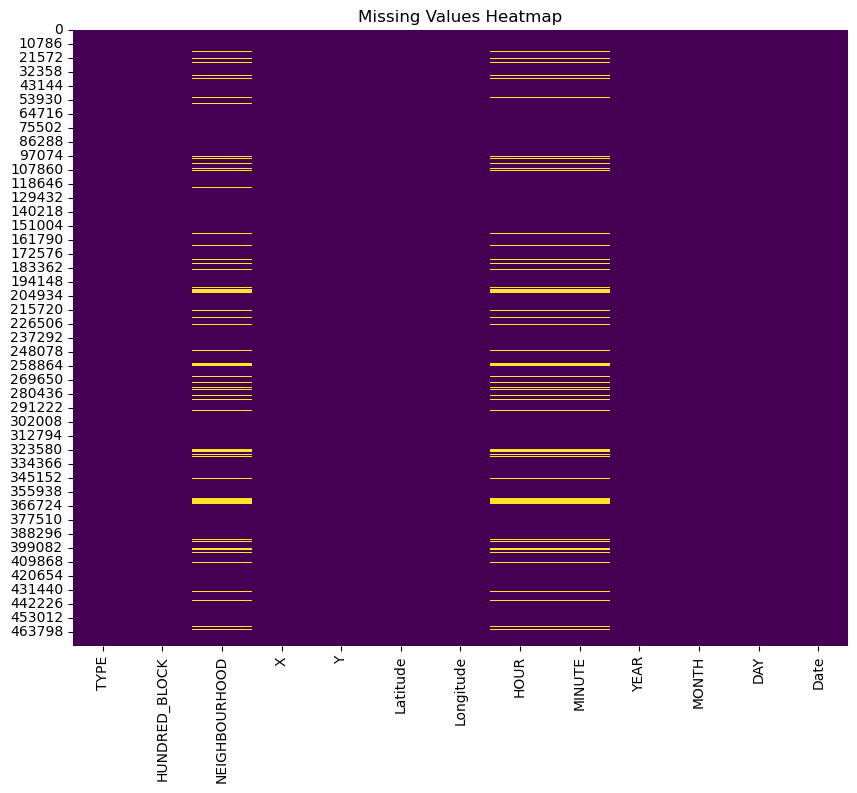

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(train.isnull(),cbar=False,cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

To visually identify which columns and rows in the train DataFrame have missing values,  we are using a heatmap for quick visualisation where yellow represents missing value and purple represent non missing values.

<span style="font-size:15px">Percentage of Missing Values</span>

In [20]:
print((train.isnull().sum()/len(train))*100)

TYPE             0.0
HUNDRED_BLOCK    0.0
NEIGHBOURHOOD    0.0
X                0.0
Y                0.0
Latitude         0.0
Longitude        0.0
YEAR             0.0
MONTH            0.0
DAY              0.0
Date             0.0
TIME_BIN         0.0
dtype: float64


<span style="font-size:15px">Handling of HUNDRED_BLOCK Missing Values</span>

In [10]:
train = train.dropna(subset=['HUNDRED_BLOCK']) #Simply dropping rows because there count is quite insignificant

<span style="font-size:15px">Handling of NEIGHBOURHOOD Missing Values</span>

In [12]:
import pandas as pd
import time
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from tqdm import tqdm

geolocator = Nominatim(user_agent="geoapi")

# Caching to avoid repeated lookups
cache = {}

# Function to reverse geocode with retry and caching
def reverse_geocode(lat, lon, retries=3):
    key = (round(lat, 6), round(lon, 6))  # Round to reduce cache size
    if key in cache:
        return cache[key]
    
    try:
        location = geolocator.reverse((lat, lon), language='en', timeout=10)
        if location and 'address' in location.raw:
            result = (location.raw['address'].get('suburb') or
                      location.raw['address'].get('neighbourhood') or
                      location.raw['address'].get('city_district'))
            cache[key] = result
            return result
    except GeocoderTimedOut:
        if retries > 0:
            time.sleep(2)
            return reverse_geocode(lat, lon, retries - 1)
    except Exception as e:
        print(f"Error at {key}: {e}")
    
    cache[key] = None
    return None

tqdm.pandas(desc="Filling neighbourhoods")
train['NEIGHBOURHOOD'] = train.progress_apply(
    lambda row: reverse_geocode(row['Latitude'], row['Longitude']) if pd.isnull(row['NEIGHBOURHOOD']) else row['NEIGHBOURHOOD'],
    axis=1
)


Filling neighbourhoods: 100%|███████████████████████████████████████████████| 474552/474552 [00:39<00:00, 12042.20it/s]


This script uses the `geopy` library to reverse geocode missing neighbourhood information in a DataFrame named `train` using latitude and longitude values. It begins by importing necessary libraries like `pandas` for data handling, `tqdm` for progress tracking, and `Nominatim` from `geopy` to access OpenStreetMap's geocoding service. A geolocator object is initialized with a custom user agent, and a cache dictionary is created to store and reuse results for already-queried coordinates. The `reverse_geocode` function takes in latitude and longitude, rounds them for caching efficiency, checks if the result is already cached, and if not, attempts to reverse geocode using Nominatim. It extracts the neighbourhood information by checking for keys like `suburb`, `neighbourhood`, or `city_district` in the returned address. If a timeout occurs, it retries up to three times with a delay. All other errors are caught and logged. The function is then applied row-wise to the `train` DataFrame using `progress_apply`, filling only the rows where the `NEIGHBOURHOOD` is missing, and shows progress via a `tqdm` progress bar. This ensures efficient and fault-tolerant population of missing geolocation-based neighbourhood data.


In [16]:
zero_coords_count = train[(train['Latitude'] == 0) & (train['Longitude'] == 0)].shape[0]
print("Rows with Latitude = 0 and Longitude = 0:", zero_coords_count)

Rows with Latitude = 0 and Longitude = 0: 49365


In [14]:
train.loc[(train['Latitude'] == 0) & (train['Longitude'] == 0), 'NEIGHBOURHOOD'] = "Unknown"
train = train.dropna(subset=['NEIGHBOURHOOD'])

As we see that there are 49,365 rows with latitude and longitude =0 respectively which are invalid hence we replace their subsequent NEIGHBOURHOOD with Unknown

<span style="font-size:15px">Handling of Hour and Minute Missing Values</span>

In [16]:
def time_bin(hour):
    if pd.isnull(hour):
        return "Unknown"
    hour = int(hour)
    if 5 <= hour <= 11:
        return "Morning"
    elif 12 <= hour <= 17:
        return "Afternoon"
    elif 18 <= hour <= 21:
        return "Evening"
    else:
        return "Night"

train['TIME_BIN'] = train['HOUR'].apply(time_bin)

In [18]:
train.drop(['HOUR','MINUTE'],axis=1,inplace=True)

As we see that hour and minutes have approximately 10% null values and they do not hold much significance to our model creation hence we convert them into categorical column 'TIME_BIN' and hence we drop HOUR and MINUTE columns.

<span style="font-size:25px; font-weight:bold">Data Visualisation </span>

<span style="font-size:15px">Countplot/Bar graph showing most common crime types</span>

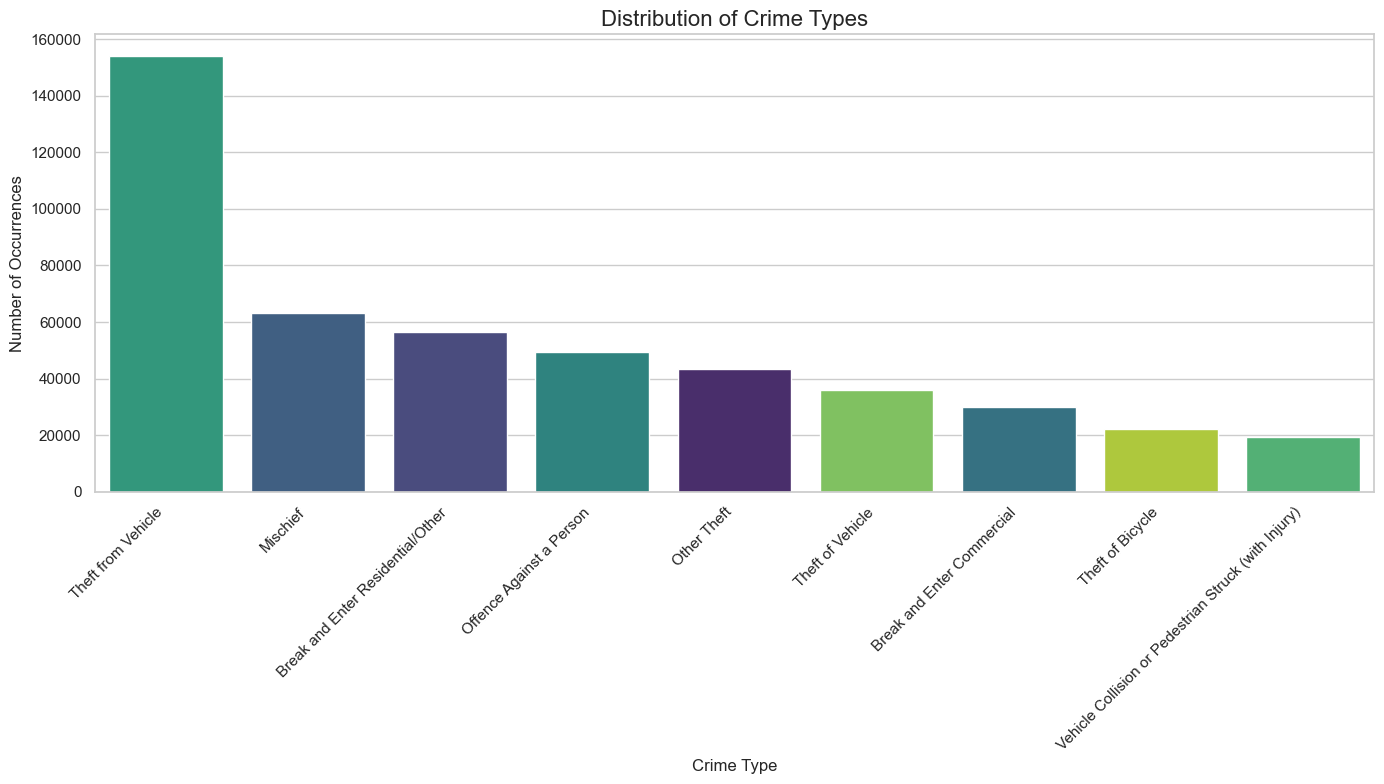

In [97]:
plt.figure(figsize=(14,8))
sns.set(style="whitegrid")  
ax = sns.countplot(data=train, x='TYPE', order=train['TYPE'].value_counts().index, palette='viridis',hue='TYPE',legend=False)
plt.xticks(rotation=45, ha='right')

plt.title('Distribution of Crime Types', fontsize=16)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)

plt.tight_layout()
plt.show()


1. **Why did you pick the specific chart?**
   The bar chart was selected because it effectively compares the frequency of different crime types. Bar charts are ideal for categorical data as they allow quick visual comparison across multiple groups, helping to easily identify which crime types are most and least prevalent.

2. **What is/are the insight(s) found from the chart?**

   * **"Theft from Vehicle"** is by far the most common crime, occurring more than twice as often as any other category.
   * **"Mischief"** and **"Break and Enter Residential/Other"** also show high frequency but significantly less than theft from vehicles.
   * **"Vehicle Collision or Pedestrian Struck (with Injury)"** is the least frequent among the listed crime types, indicating it is comparatively rare.
   * Property crimes dominate the top ranks, suggesting a focus area for law enforcement or community safety efforts.

3. **Will the gained insights help create a positive business impact?**
   **Yes,** the insights can contribute to positive business impact in multiple ways:

   * **Resource Allocation:** Authorities can allocate more resources (patrols, surveillance) to areas with high vehicle-related thefts.
   * **Insurance Risk Assessment:** Insurance companies can use this data to assess risk and adjust premiums accordingly.
   * **Urban Planning and Policy:** Urban developers and policymakers can design safer environments (e.g., better lighting, secure parking).

   **Negative Impact Possibility:**

   * If the data becomes public without context, areas with high crime rates may suffer in terms of **real estate value**, **business investment**, or **tourism**, potentially leading to **negative economic growth** in those neighborhoods.
   * However, **proactive response** using this data can mitigate these effects and turn it into a  report format or PDF.


<span style="font-size:15px">Line Graph showing distribution of crimes over years</span>

<Figure size 1600x800 with 0 Axes>

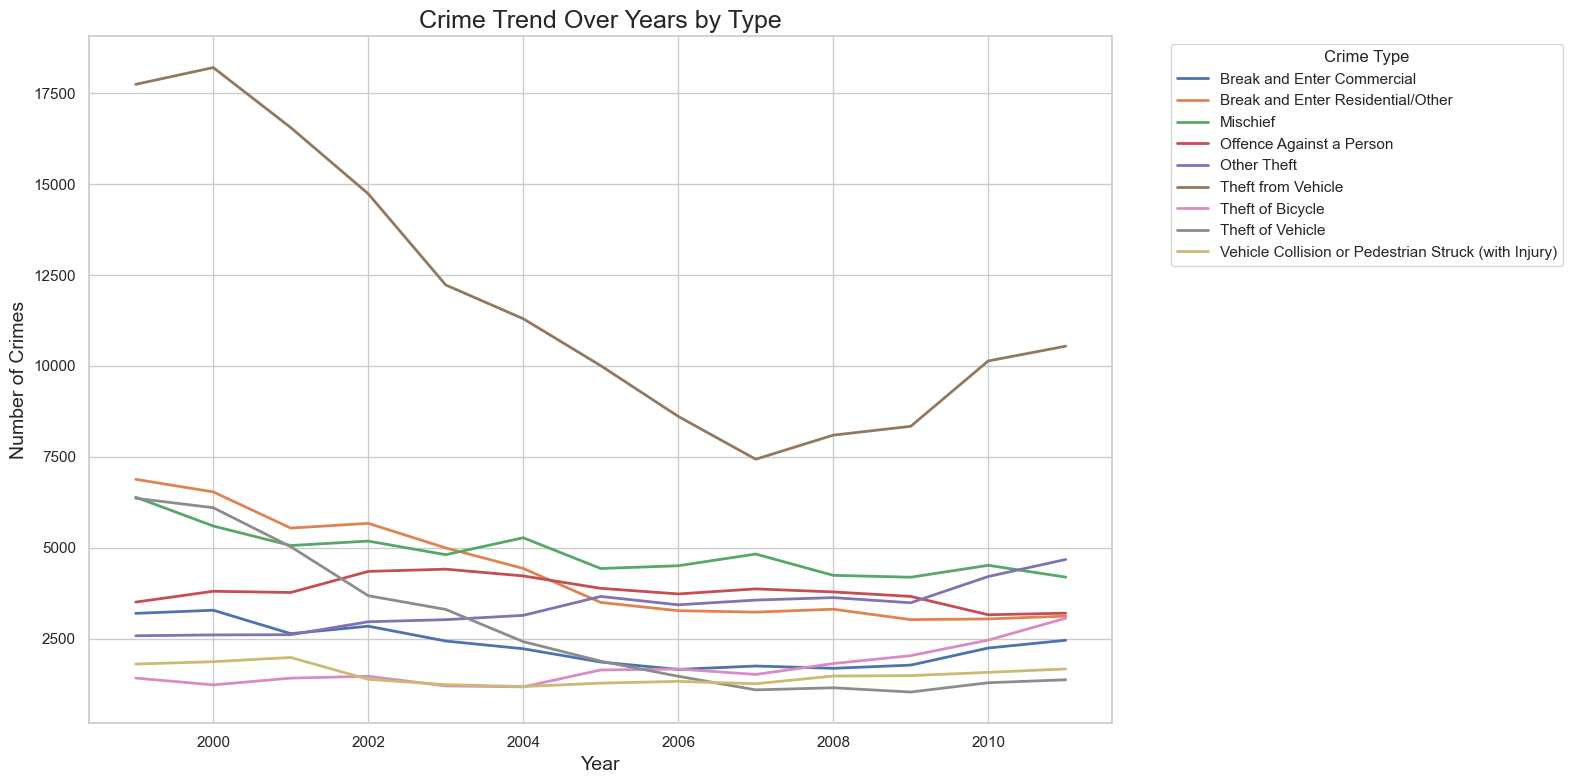

In [108]:
yearly_crime_counts = train.groupby(['YEAR', 'TYPE']).size().reset_index(name='Crime_Count')
crime_trend = yearly_crime_counts.pivot(index='YEAR', columns='TYPE', values='Crime_Count').fillna(0)
plt.figure(figsize=(16, 8))
crime_trend.plot(kind='line', figsize=(16, 8), linewidth=2)
plt.title('Crime Trend Over Years by Type', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.grid(True)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


---

### 1. Why did you pick the specific chart?

A **line chart** is well-suited for showing trends over time. Since the goal is to understand how crime patterns have changed year by year, this chart provides a clear visual representation of increases or decreases in various crime types. It also helps compare the behavior of different crime categories across time.

---

### 2. What are the insights found from the chart?

**Theft from Vehicle**:

* This is the most frequent crime type across all years.
* It showed a sharp decline from around 1999 to 2007, followed by a slight increase after that.

**Mischief and Break and Enter (Residential/Other)**:

* Both showed a gradual declining trend, indicating improved control or preventive measures over the years.

**Other Theft**:

* This category remained relatively stable, with a slight upward trend in recent years.

**Offence Against a Person**:

* The trend is mostly stable, suggesting consistent reporting and occurrence rates.

**Theft of Vehicle**:

* This crime type declined significantly from 1999 to 2007, and then stabilized.

**Lower-volume crimes (like Bicycle Theft and Vehicle Collision with Injury)**:

* These have relatively low counts but show a gradual increase in the later years.

---

### 3. Will the gained insights help create a positive business impact?

Yes, the insights can support positive outcomes:

* **Resource Allocation**: Law enforcement and city planners can prioritize areas and years with high crime rates for interventions.
* **Policy Effectiveness**: The drop in crimes like "Theft from Vehicle" shows that past policies or preventive efforts were likely effective.
* **Strategic Planning**: Trends can guide future investment in crime prevention programs, awareness campaigns, or infrastructure.

---

### Are there any insights that suggest negative outcomes?

Not directly, but there are warning signs:

* The recent increase in vehicle-related crimes may suggest a weakening in previous preventive measures.
* The rise in less frequent crimes like bicycle theft could incators for where improvement or renewed focus is needed.
ne (trend forecas.ing) added using linear regression or moving averages?


<span style="font-size:15px">Pie chart showing crime distribution by time of day</span>

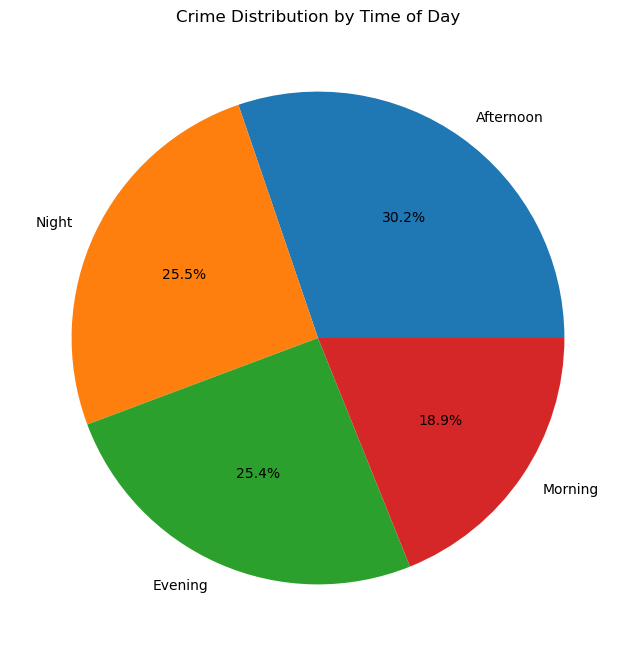

In [39]:
time_bin_counts = train[train['TIME_BIN'] != 'Unknown']['TIME_BIN'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(time_bin_counts, labels=time_bin_counts.index, autopct='%1.1f%%')
plt.title('Crime Distribution by Time of Day')
plt.show()

---

### 1. Why did you pick the specific chart?

A **pie chart** is ideal for visualizing parts of a whole. Since we want to compare the share of crimes across time bins (Morning, Afternoon, Evening, Night), a pie chart clearly communicates which time of day sees the most or least crime by showing relative proportions.

---

### 2. What is/are the insight(s) found from the chart?

* **Afternoon** has the **highest share of crimes** at **30.2%**, indicating peak criminal activity during this period.
* **Night** and **Evening** contribute nearly equally, around **25.5% and 25.4%** respectively.
* **Morning** has the **lowest crime rate**, contributing only **18.9%** to total crimes.

---

### 3. Will the gained insights help create a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

* **Positive Impact:**

  * Law enforcement and city planning can **reallocate resources** (e.g., patrol teams) to **Afternoon**, where crime is highest.
  * **Community alert systems** or neighborhood watch groups can be strengthened during **Afternoon to Night**.
  * Businesses and schools can consider **extra security during Afternoon hours**.

* **No Insight Leading to Negative Growth:**

  * The chart only shows **distribution**, not economic or business loss. However, ignoring these insights could lead to **inefficient resource deployment**, increasing public safety risk.


<span style="font-size:15px">Crime Hotspots by neighbourhood using chloropeth map</span>

<Figure size 1200x1000 with 0 Axes>

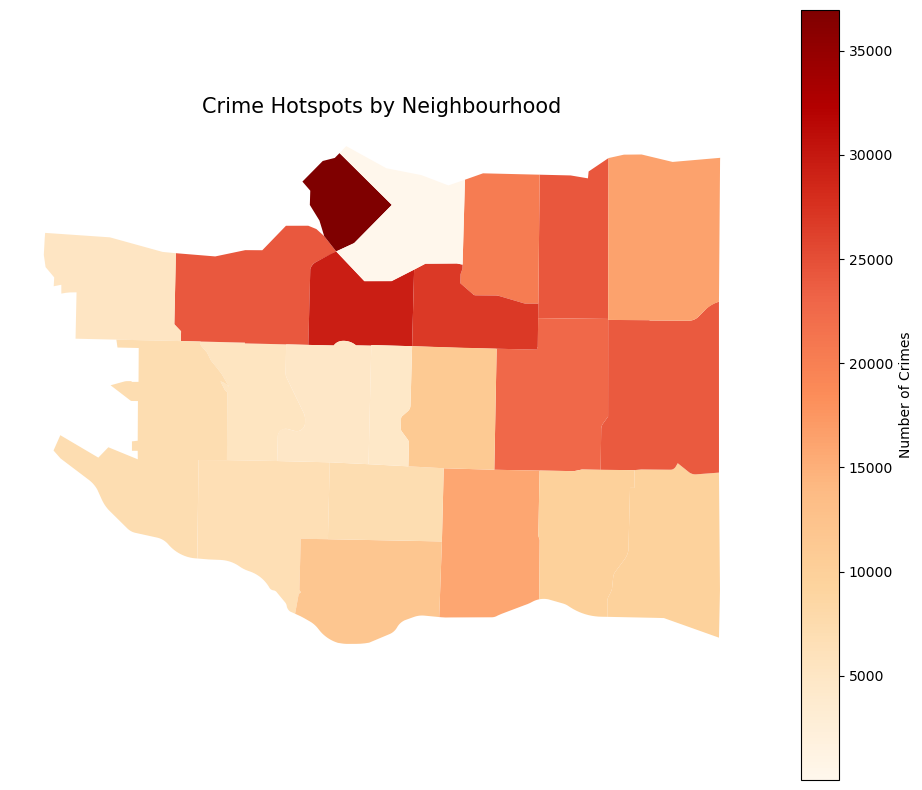

In [50]:
import geopandas as gpd
crime_data = train.copy()
neigh_crime_count = crime_data.groupby('NEIGHBOURHOOD').size().reset_index(name='Crime_Count')
gdf = gpd.read_file('local-area-boundary.geojson')
gdf['NEIGHBOURHOOD'] = gdf['name']
merged = gdf.merge(neigh_crime_count, on='NEIGHBOURHOOD', how='left')
merged['Crime_Count'] = merged['Crime_Count'].fillna(0)
plt.figure(figsize=(12, 10))
merged.plot(column='Crime_Count',
            cmap='OrRd',
            legend=True,
            legend_kwds={'label': "Number of Crimes"},
            figsize=(12, 10))
plt.title('Crime Hotspots by Neighbourhood', fontsize=15)
plt.axis('off')
plt.show()




### 1. Why did you pick the specific chart?

A **choropleth map** is ideal for showing **spatial patterns** using color gradients. Since we aim to identify **which neighbourhoods have more crimes**, mapping the **number of crimes geographically** provides intuitive and immediate insights about **crime concentration areas**.

---

### 2. What is/are the insight(s) found from the chart?

* **Northern and central neighbourhoods** show the **highest crime volumes**, highlighted by **dark red shades**.
* **Southern and western areas** have **fewer crimes**, indicated by **lighter colors**.
* Crime is **not evenly distributed**; it is clustered, suggesting localized hotspots.

---

### 3. Will the gained insights help create a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

* **Positive Impact:**

  * Police departments can **prioritize high-crime neighbourhoods** for patrolling or surveillance.
  * Urban planners and city councils can **invest in safety infrastructure** (CCTV, lighting) in high-crime zones.
  * Public awareness campaigns can **target specific areas** for better community safety.

* **No Insight Leading to Negative Growth:**

  * The map is diagnostic, not predictive. It doesn’t highlight economic loss directly.
  * But **failure to act on this insight** may worsen public safety, indirectly affecting local busineatmap or spatial scatter as well.


<span style="font-size:15px">Heatmap of Crime Types vs Time Of Day </span>

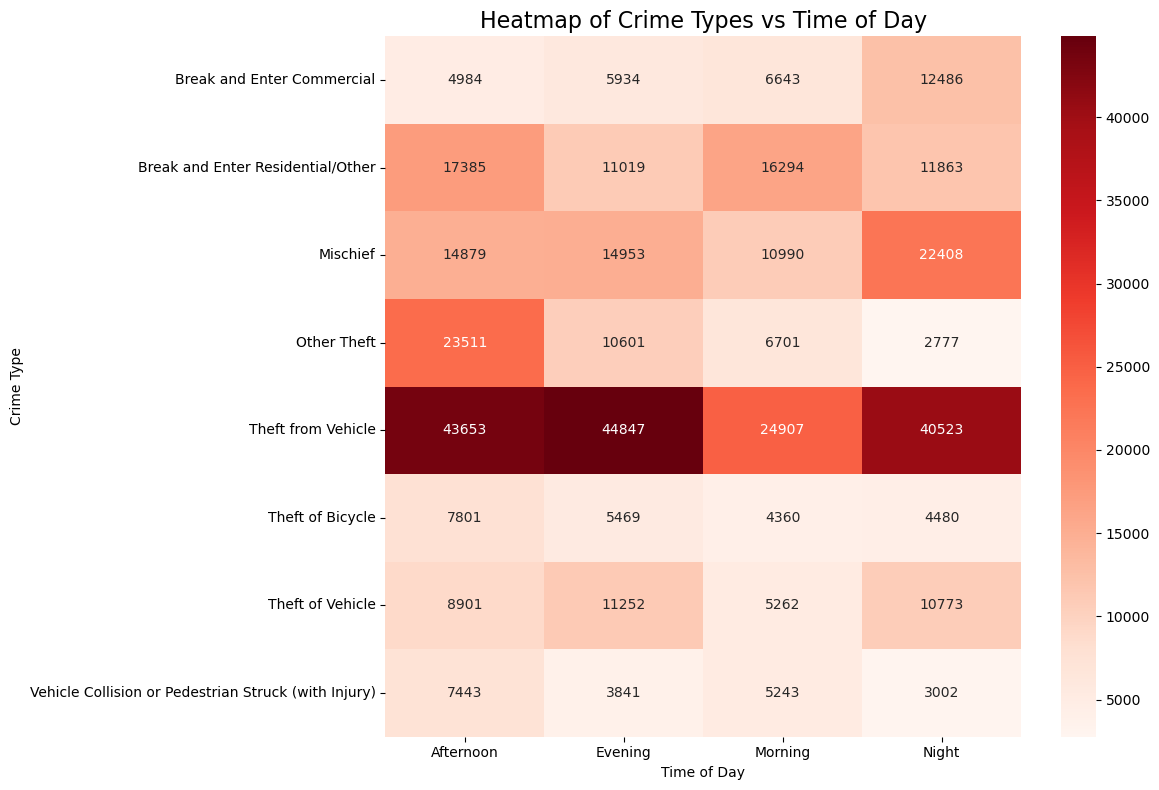

In [61]:
filtered = train[train['TIME_BIN'] != 'Unknown']
pivot_table = filtered.pivot_table(index='TYPE', columns='TIME_BIN', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Reds')
plt.title('Heatmap of Crime Types vs Time of Day', fontsize=16)
plt.xlabel('Time of Day')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()



### 1. Why did you pick the specific chart?

A **heatmap** is ideal for comparing two categorical variables—**crime types** and **time bins**—with a quantitative measure (crime count). It allows us to **visually detect patterns**, such as when specific crimes occur most frequently.

---

### 2. What is/are the insight(s) found from the chart?

* **Theft from Vehicle** is the most frequent crime across all time bins, peaking in **Evening (44,847)** and **Afternoon (43,653)**.
* **Other Theft** and **Mischief** are more common in **Afternoon and Night**.
* **Break and Enter Commercial** spikes in **Night**, while **Break and Enter Residential/Other** peaks in **Afternoon**.
* **Theft of Bicycle** occurs most in **Afternoon**, likely tied to increased outdoor activity.
* **Vehicle Collisions (with injury)** are relatively low across all time bins, peaking mildly in **Afternoon**.

---

### 3. Will the gained insights help create a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

* **Positive Impact:**

  * Helps **allocate law enforcement by crime type and time**, optimizing patrol schedules.
  * Enables **public safety messaging** tailored to specific crimes and times (e.g., alert about vehicle thefts in the evening).
  * Businesses can enhance **targeted security (e.g., parking lots in the evening)**.

* **No Insight Leading to Negative Growth:**

  * The chart is descriptive, not causal. It shows **when** crimes occur, not their causes or losses.
  * However, **ignoring these patterns** could result in **poor resource planning** and increased r plot** or **facet plots by year**.


<span style="font-size:15px">Crime counts per year by type using bar graph</span>

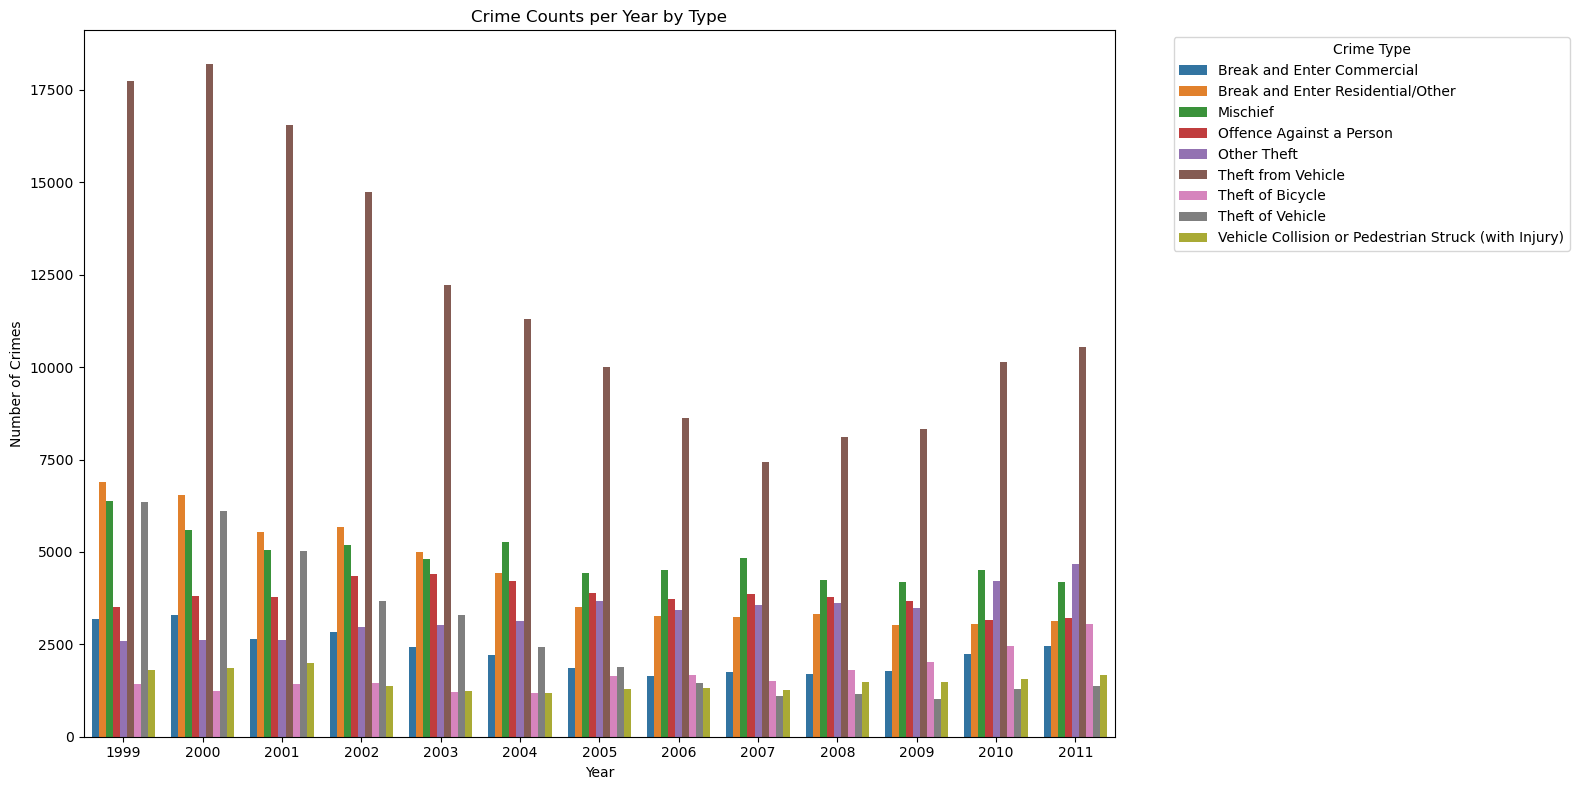

In [37]:
yearly_crime_counts = train.groupby(['YEAR', 'TYPE']).size().reset_index(name='Crime_Count')
plt.figure(figsize=(16, 8))
sns.barplot(data=yearly_crime_counts, x='YEAR', y='Crime_Count', hue='TYPE')
plt.title('Crime Counts per Year by Type')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 1. Why did you pick the specific chart?

A **grouped bar chart** is ideal for visualizing **trends over time** for multiple categories. In this case, it helps **compare how different crime types have fluctuated yearly**, providing a clear year-by-year breakdown across all types.

---

### 2. What is/are the insight(s) found from the chart?

* **Theft from Vehicle** is the **most frequent crime**, with a sharp **decline from 1999 to 2007**, then a slight **resurgence after 2008**.
* **Break and Enter** (both types) and **Theft of Vehicle** also show a **declining trend** over the years.
* **Mischief** and **Offence Against a Person** maintain a **moderate but stable presence** throughout the period.
* **Theft of Bicycle** shows a **steady rise post-2007**, possibly linked to increased bike usage.
* **Vehicle Collisions (with injury)** remain relatively **stable and low** across years.

---

### 3. Will the gained insights help create a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

* **Positive Impact:**

  * Crime-prevention programs launched around **2005–2008** may have been effective, especially in reducing **property-related crimes**.
  * Rising **bicycle thefts** after 2008 signal the need for **bike infrastructure improvements and security**.
  * Allows for **historical benchmarking** to evaluate effectiveness of law enforcement strategies.

* **No Insight Leading to Negative Growth:**

  * The insights reflect **historic trends**, not direct causes or losses.
  * Ignoring the **resurgence of certain crimes (e.g., theft from vehicle post-2008)** may lead to **complacency in enforcement**, potentially reversing progress.

<span style="font-size:15px">Boxplot showing distribution of crimes across months</span>

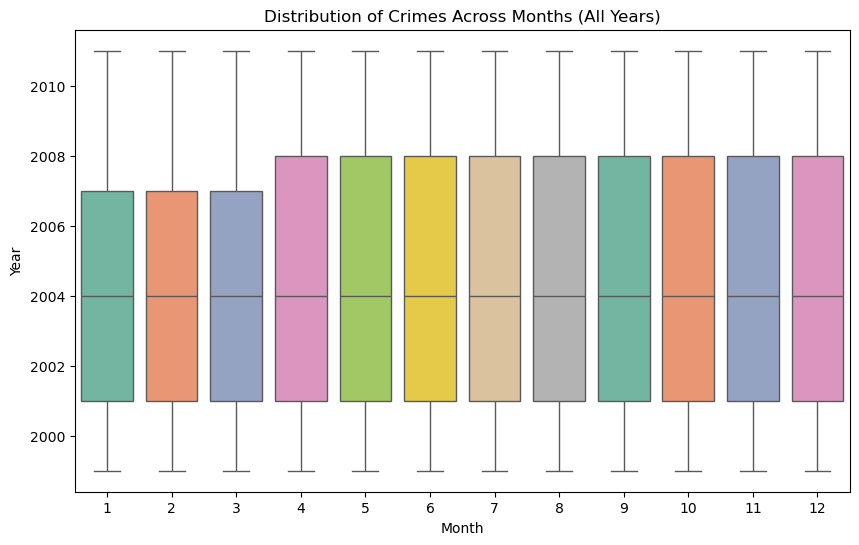

In [42]:
monthly_counts = train.groupby('MONTH').size().reset_index(name='Crime_Count')
plt.figure(figsize=(10, 6))
sns.boxplot(x='MONTH', y='YEAR', data=train, hue='MONTH',legend=False,palette='Set2')
plt.title('Distribution of Crimes Across Months (All Years)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()



### 1. Why did you pick the specific chart?

A **box plot** is ideal for visualizing the **distribution, spread, and outliers** of data across categories. In this case, it shows how crime is **distributed across months over multiple years**, helping detect **seasonal patterns** or irregularities.

---

### 2. What is/are the insight(s) found from the chart?

* Crime data across all months is **evenly distributed** across years—there’s **no strong seasonal variation** visible.
* Each month shows a **similar interquartile range (IQR)**, with **medians clustered around mid-2004**, indicating no specific month is more crime-prone.
* No month shows a significantly **higher or lower frequency** of crimes across the timeline.
* The **lack of extreme outliers** suggests consistent monthly crime reporting.

---

### 3. Will the gained insights help create a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

* **Positive Impact:**

  * Authorities don’t need to **over-allocate resources to any particular month**—a uniform strategy may suffice.
  * Helpful in **budget planning**, as crime prevention expenses can be **evenly distributed year-round**.
  * Confirms **no strong seasonal spikes**, which can help **dispel myths or biases** about certain months being more dangerous.

* **No Insight Leading to Negative Growth:**

  * The chart lacks actionable seasonal trends, but this isn’t harmful.
  * **Negative impact may arise** only if misinterpreted—e.g., assuming seasonal safety without evaluating other variables (like timext, if available in your dashboard?


<span style="font-size:15px">Line Graph showing total crimes per month</span>

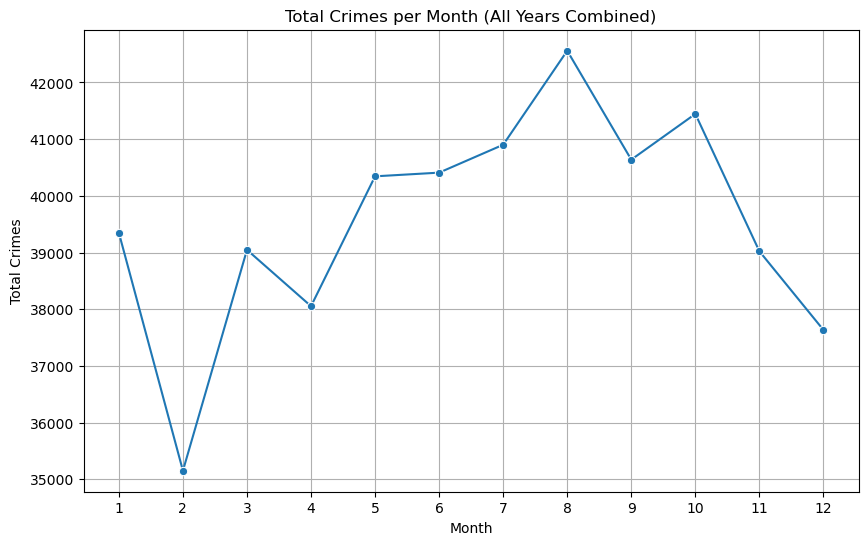

In [33]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_counts, x='MONTH', y='Crime_Count', marker='o')
plt.title('Total Crimes per Month (All Years Combined)')
plt.xlabel('Month')
plt.ylabel('Total Crimes')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

### 1. Why did you pick the specific chart?

A **line chart** is ideal for showing **trends over a continuous variable**—in this case, months of the year. It helps to **visually track crime volume fluctuations** across months and detect any **seasonal peaks or dips**.

---

### 2. What is/are the insight(s) found from the chart?

* **August** has the **highest number of crimes**, peaking at over **42,500** incidents.
* **February** shows the **lowest crime count**, around **35,200**, which may partially be due to fewer days.
* Crime rates **rise consistently from April to August**, suggesting a **seasonal increase** during warmer months.
* A **secondary peak** is observed in **October**, followed by a decline towards **December**.
* Months **May through October** generally show **above-average crime levels**.

---

### 3. Will the gained insights help create a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

* **Positive Impact:**

  * Enables **targeted planning for law enforcement** and **community safety campaigns** in high-crime months (especially **summer** and **early fall**).
  * Retailers, schools, and local bodies can **schedule enhanced security and monitoring** in peak crime months.
  * May support **policy-level planning** (e.g., allocating funds seasonally or planning awareness drives).

* **No Insight Leading to Negative Growth:**

  * The insights are **informative rather than alarming**.
  * Ignoring the clear seasonal rise could lead to **under-preparedness during high-crime months**, affecting public safety and business operations.

<span style="font-size:15px">Correlation Heatmap</span>

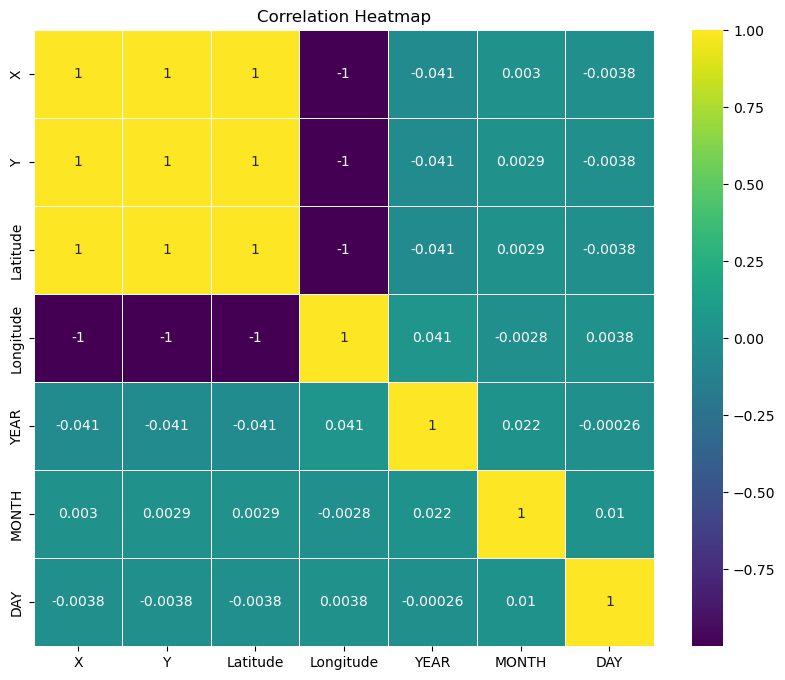

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='viridis', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### 1. Why did you pick the specific chart?

A **correlation heatmap** is ideal for showing the **strength and direction of linear relationships** between numeric variables in a dataset. It is a compact and visual way to:

* Detect multicollinearity,
* Identify patterns or anomalies, and
* Understand how features may relate to each other for modeling or deeper insights.

---

### 2. What is/are the insight(s) found from the chart?

Key observations from the heatmap:

* **Perfect correlations (`1` or `-1`)**:

  * `X`, `Y`, and `Latitude` are **perfectly positively correlated** with each other.
  * These are also **perfectly negatively correlated** with `Longitude`. This likely indicates that the `X`, `Y`, `Latitude`, and `Longitude` columns are **direct mathematical transformations** of each other.

* **No significant correlation** between spatial coordinates (`X`, `Y`, `Latitude`, `Longitude`) and temporal features (`YEAR`, `MONTH`, `DAY`), with correlation values close to zero. This implies that the **location of crimes is largely independent of the date**.

* **Time components (YEAR, MONTH, DAY)** are **not strongly correlated with each other**, meaning crime frequency or location likely varies **independently across different time granularities**.

<span style="font-size:15px">Pairplot with respect to hue for 10,000 samples</span>

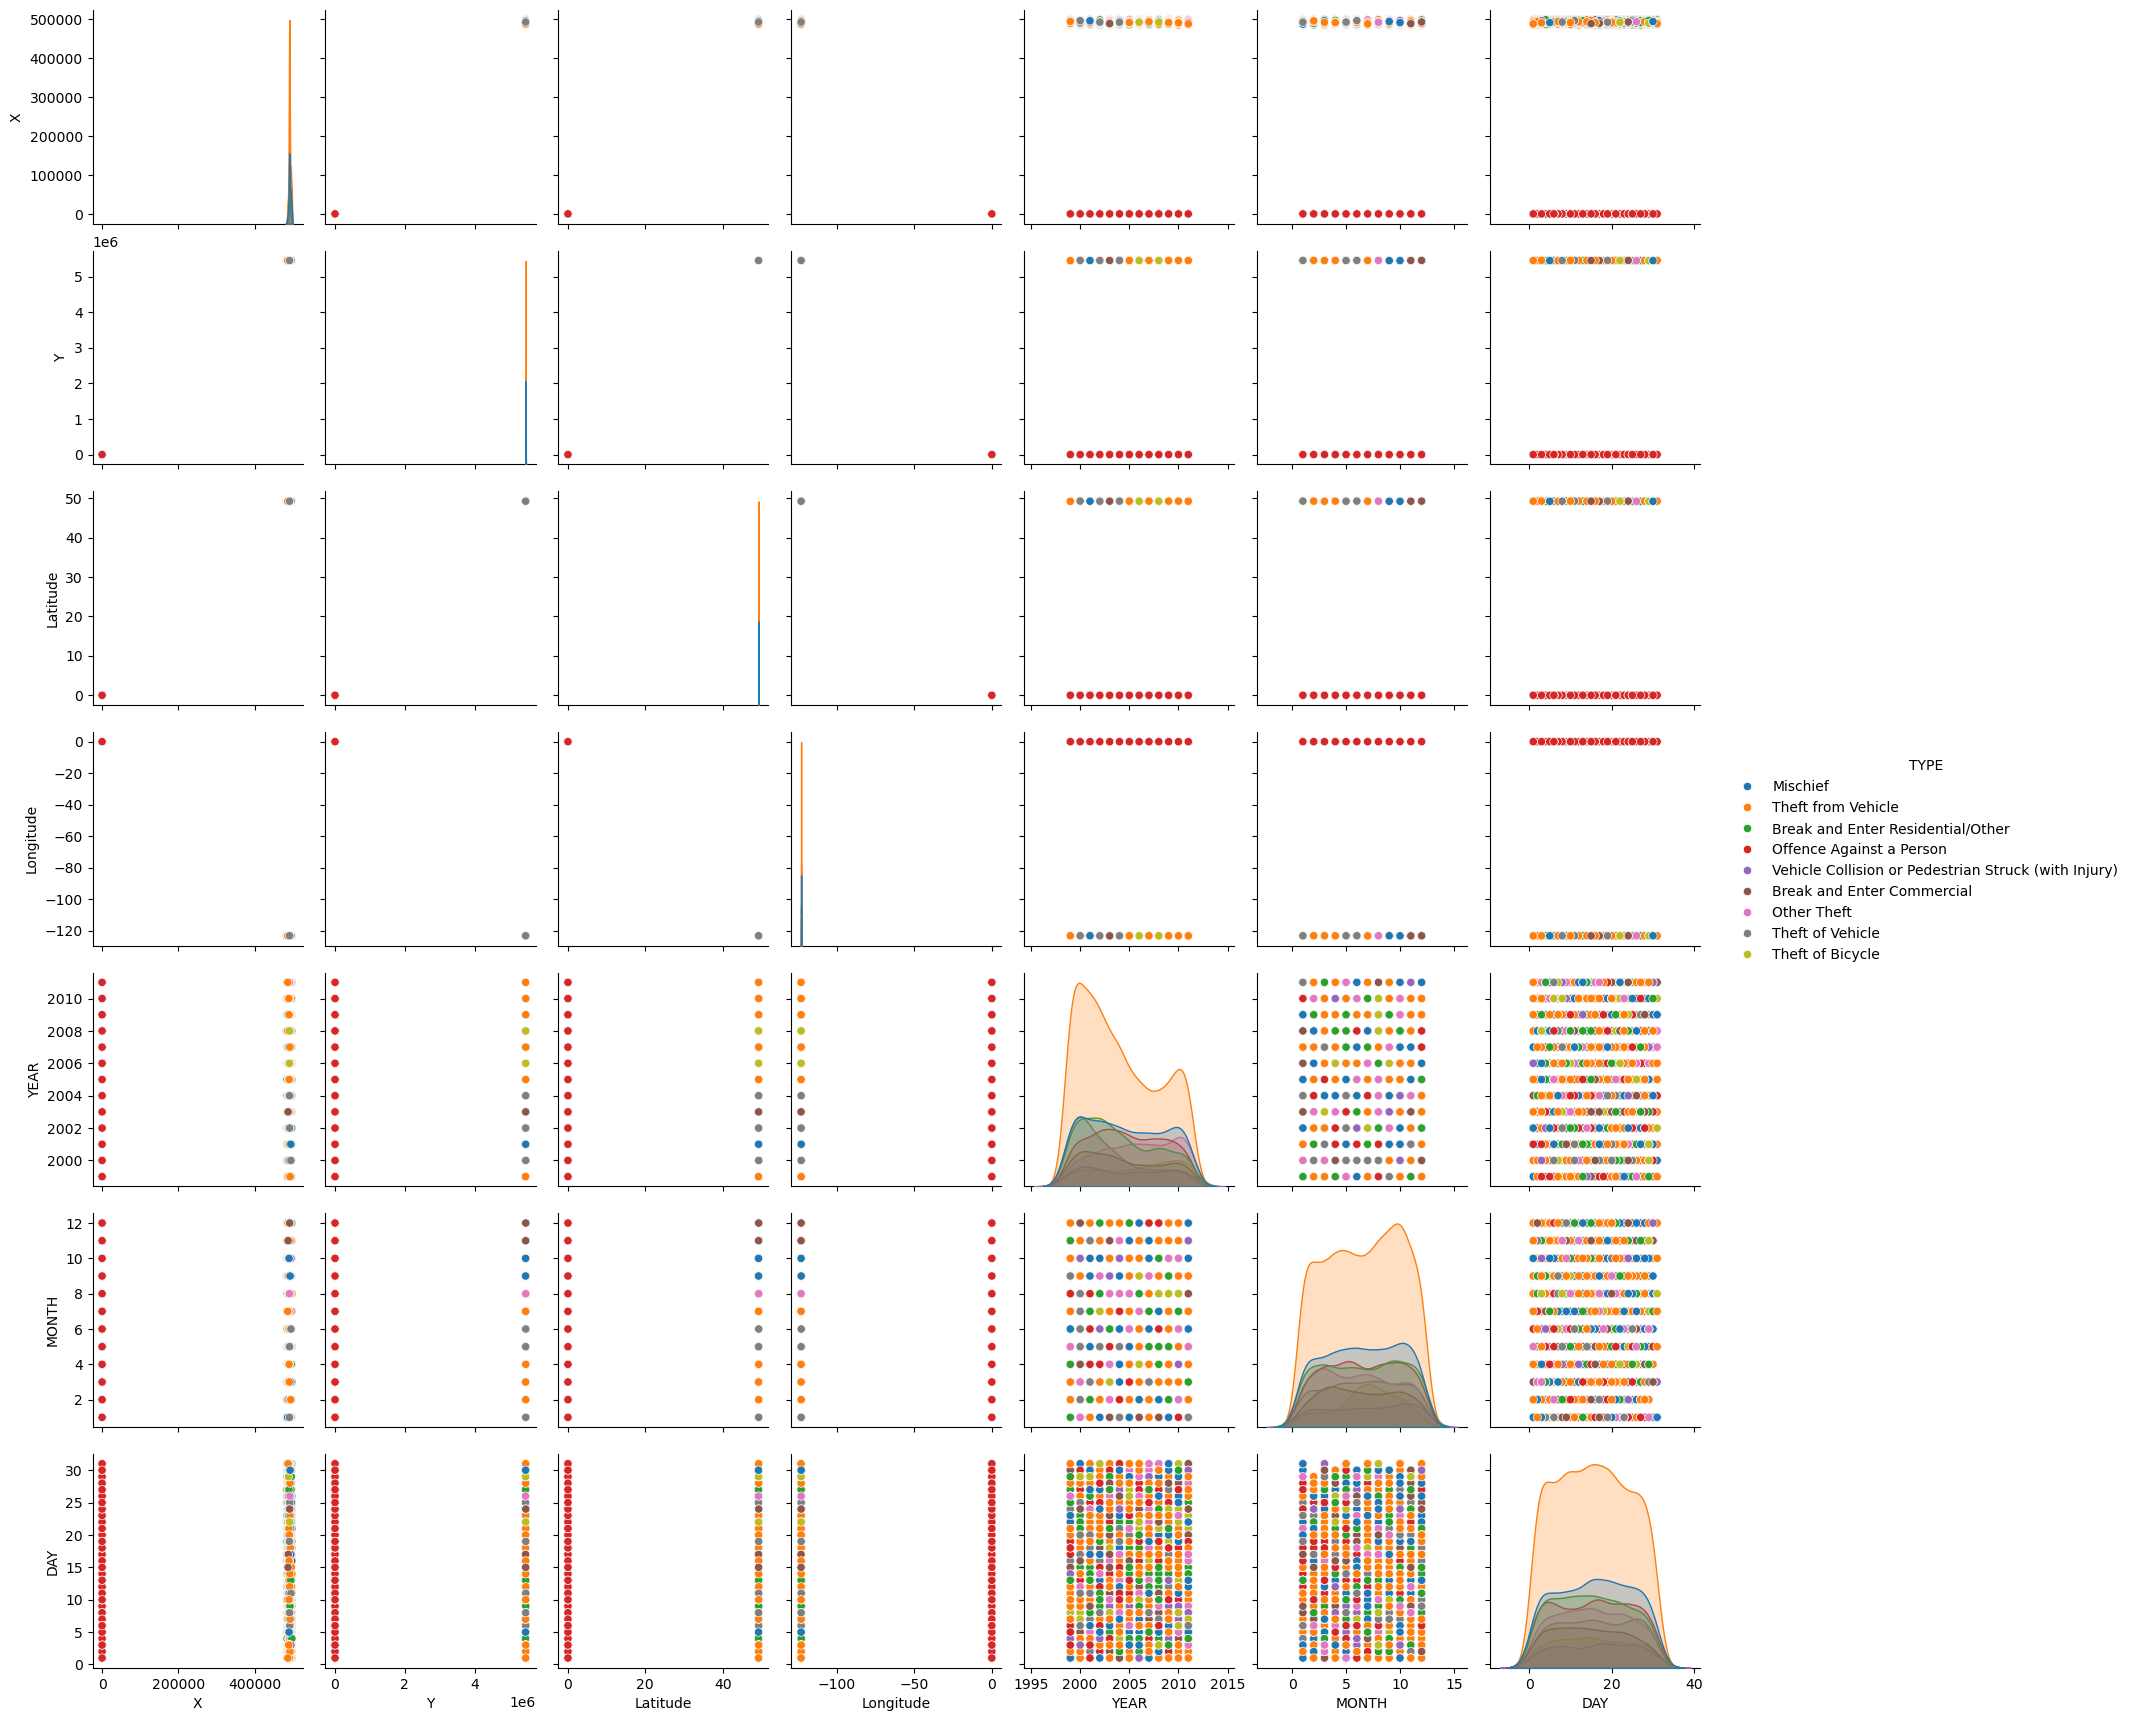

In [49]:
sns.pairplot(data=train.sample(10000, random_state=1), hue='TYPE')



### 1. Why did you pick the specific chart?

The **Seaborn `pairplot`** was selected to:

* Visualize **pairwise relationships** between multiple numerical features in the dataset (e.g., `Latitude`, `Longitude`, `YEAR`, `MONTH`, `DAY`, etc.).
* Identify **patterns or separability** between different crime `TYPE`s.
* Detect **correlations, clusters, and outliers** in the context of geographic and temporal attributes.
* Leverage the `hue='TYPE'` parameter to **compare crime categories** visually.

This chart is particularly useful in **exploratory data analysis (EDA)** to get a multi-dimensional understanding of the dataset in one view.

---

### 2. What is/are the insight(s) found from the chart?

1. **Temporal Concentration**
   The `YEAR` density plots indicate a higher concentration of crime reports between 2003 and 2012, suggesting data sparsity before and after that period.

2. **Monthly Patterns**
   Crime reports span all 12 months fairly evenly, but some `TYPE`s show more pronounced activity in specific months.

3. **Geographic Range Consistency**
   `Latitude` and `Longitude` distributions show tight clustering, confirming crimes are geographically concentrated (likely in a specific city such as Vancouver).
   Outliers or flat areas in the scatterplots (e.g., `X`, `Y`) might suggest coordinate encoding or projection issues, or that those fields are not meaningful for analysis.

4. **Crime Type Distribution**
   Some crime types (like "Theft from Vehicle" and "Other Theft") are much more frequent, dominating the density plots.
   Distinct color groupings in some pairwise comparisons may suggest that certain crime types tend to occur during specific times or locations.

5. **Redundancy in X/Y**
   The `X` and `Y` variables show little variation and don't contribute much to the visual patterns. These may represent internal coordinate systems or projections that are less interpretable and potentially report or formatted for a presentation.
ich variables to keep/remove for modeling.


<span style="font-size:25px; font-weight:bold">Hypothesis Testing </span>

<span style="font-size:15px; font-weight:bold">Hypothetical Statement 1:
"Crime counts significantly vary across different months of the year." </span>


**Null Hypothesis (H₀)**:
There is no significant difference in the number of crimes across months.

**Alternate Hypothesis (H₁)**:
There is a significant difference in the number of crimes across months.

We will use a **One-Way ANOVA** to test whether the mean number of crimes differs significantly across months

Why ANOVA ?

We are comparing means of more than two groups (12 months).

Crime counts are continuous numeric values.

Each month represents an independent group.

This test helps determine if at least one month’s crime rate differs significantly from the others.

In [89]:
from scipy.stats import f_oneway
monthly_counts = train.groupby(['YEAR', 'MONTH']).size().reset_index(name='crime_count')
crime_data_by_month = [
    monthly_counts[monthly_counts['MONTH'] == month]['crime_count'].values
    for month in range(1, 13)
]
f_stat, p_value = f_oneway(*crime_data_by_month)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")


F-statistic: 0.6844319514752397
P-value: 0.7516395543933219


Since the p-value (0.752) > 0.05, we fail to reject the null hypothesis. There is no statistically significant difference in the number of crime incidents across different months. In other words, crime does not vary significantly month-to-month over the years in this dataset.

<span style="font-size:15px; font-weight:bold">Hypothetical Statement 2:
"Theft from Vehicle" crimes occur more frequently than "Break and Enter Commercial" crimes." </span>

**Null Hypothesis (H₀)**:
There is no significant difference between the mean number of Theft from Vehicle and Break and Enter Commercial crimes.

**Alternative Hypothesis (H₁)**:
The mean number of Theft from Vehicle crimes is greater than Break and Enter Commercial crimes.

We will use a **Independent two-sample t-test** (one-tailed)

Why t-test?

We are comparing the means of two independent groups.

Assumes normality and equal variance.

One-tailed because we suspect Theft from Vehicle > Break and Enter Commercial

In [103]:
from scipy.stats import ttest_ind
group1 = train[train['TYPE'] == 'Theft from Vehicle'].groupby('YEAR').size()
group2 = train[train['TYPE'] == 'Break and Enter Commercial'].groupby('YEAR').size()

# One-tailed t-test
t_stat, p_val_two_tailed = ttest_ind(group1, group2, equal_var=False)
p_val_one_tailed = p_val_two_tailed / 2

print("T-statistic:", t_stat)
print("One-tailed P-value:", p_val_one_tailed)


T-statistic: 9.017935765545921
One-tailed P-value: 3.88934924722312e-07


Since the p-value is much less than 0.05, we strongly reject the null hypothesis.There is a statistically significant difference in the crime counts.
Specifically, Theft from Vehicle crimes occur significantly more frequently than Break and Enter Commercial crimes.

<span style="font-size:15px; font-weight:bold">Hypothetical Statement 3:
"Testing if crime distribution differs significantly by time of day" </span>

**Null Hypothesis (H₀)**:
The mean number of crimes is equal across all time bins.

**Alternate Hypothesis (H₁)**:
There is a significant difference in crime frequency between at least two time bins.



We will use a **One-Way ANOVA** because : 

We're comparing more than two groups (4 time bins).

Each group contains crime counts across years.

Assumes groups are independent with approximately normal distribution.


In [114]:
time_data = train[train['TIME_BIN'] != 'Unknown']
grouped = time_data.groupby(['YEAR', 'TIME_BIN']).size().reset_index(name='crime_count')
bins = ['Morning', 'Afternoon', 'Evening', 'Night']
crime_groups = [grouped[grouped['TIME_BIN'] == bin]['crime_count'] for bin in bins]
f_stat, p_val = f_oneway(*crime_groups)
print("F-statistic:", f_stat)
print("P-value:", p_val)

F-statistic: 7.707458296562186
P-value: 0.00026542975428967447


Since the p-value is much less than 0.05, we reject the null hypothesis.There is a statistically significant difference in crime frequency across different times of the day.This supports the observation that certain time periods experience more crime than others.

<span style="font-size:25px; font-weight:bold">Feature Engineering & Data Pre-processing</span>

In [122]:
train.isnull().sum()

TYPE             0
HUNDRED_BLOCK    0
NEIGHBOURHOOD    0
X                0
Y                0
Latitude         0
Longitude        0
YEAR             0
MONTH            0
DAY              0
Date             0
TIME_BIN         0
dtype: int64

In [146]:
train['TYPE'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [144]:
type_map = {
    'Other Theft': 0,
    'Break and Enter Residential/Other': 1,
    'Mischief': 2,
    'Break and Enter Commercial': 3,
    'Offence Against a Person': 4,
    'Theft from Vehicle': 5,
    'Vehicle Collision or Pedestrian Struck (with Injury)': 6,
    'Theft of Vehicle': 7,
    'Theft of Bicycle': 8
}
train['TYPE'] = train['TYPE'].map(type_map)

Type is mapped to integers for ease in model fitting

In [150]:
df = train.groupby(['YEAR', 'MONTH', 'TYPE']).size().reset_index(name='Incident_Counts')

In [152]:
df.head()

,YEAR,MONTH,TYPE,Incident_Counts
0,1999,1,0,247
1,1999,1,1,644
2,1999,1,2,551
3,1999,1,3,303
4,1999,1,4,338


A new dataframe df is made using year,month and type grouped by Incident_Counts

In [154]:
df['YEAR'].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011], dtype=int64)

In [160]:
print(df['MONTH'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   YEAR             1404 non-null   int64
 1   MONTH            1404 non-null   int64
 2   TYPE             1404 non-null   int64
 3   Incident_Counts  1404 non-null   int64
dtypes: int64(4)
memory usage: 44.0 KB


In [168]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(df[['MONTH', 'TYPE']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['MONTH', 'TYPE']))
processed_df = pd.concat([df[['YEAR']], encoded_df, df[['Incident_Counts']]], axis=1)

In this case, One-Hot Encoding was used because it effectively handles nominal categorical variables (MONTH and TYPE), ensures compatibility with machine learning models, and avoids multicollinearity by dropping the first category. This results in a clean and model-ready dataset.

In [172]:
from sklearn.model_selection import train_test_split
X = processed_df.drop('Incident_Counts', axis=1)
y = processed_df['Incident_Counts']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The 80:20 split was chosen to maximize learning from the available data while still preserving a robust portion for model validation. It’s a standard practice that balances model performance evaluation with training effectiveness.

In [174]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The StandardScaler (Standardization) method was used to normalize feature values so that they have a mean of 0 and standard deviation of 1. This improves model performance and ensures that algorithms sensitive to feature scaling work correctly, all while avoiding data leakage by fitting only on the training data.

In [186]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("MSE:", mean_squared_error(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 16226.268520630929
RMSE: 127.38237131028347
R2 Score: 0.8020889150365316


In this project, a **Linear Regression** model was used to predict crime incident counts based on features like year, month, and type of crime. This model assumes a linear relationship between the input variables and the target. To evaluate its performance, metrics like **Mean Squared Error (MSE)**, **Root Mean Squared Error (RMSE)**, and **R² Score** were used. The model achieved an **MSE of 16226.27**, **RMSE of 127.38**, and an **R² score of 0.8021**, indicating that it explains **80.2% of the variance** in the data. These results show that the model has strong predictive ability with relatively low error, making it an effective baseline for this regression task.


In [192]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 200]
}

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

print("Best alpha:", grid_search.best_params_['alpha'])
print("Best CV MSE:", -grid_search.best_score_)

Best alpha: 10
Best CV MSE: 15552.655150420882


The hyperparameter optimization technique used is **Grid Search with Cross-Validation (GridSearchCV)**. This method systematically evaluates a specified set of `alpha` values for the Ridge regression model by exhaustively searching through all options. Using 5-fold cross-validation, the model’s performance is assessed across different train-validation splits to ensure the selected hyperparameter generalizes well and avoids overfitting. The scoring metric, negative mean squared error, guides the search to minimize prediction error and find the best balance between bias and variance. GridSearchCV automates and streamlines this tuning process, making it an efficient and reliable way to optimize model performance.


In [194]:
best_ridge = grid_search.best_estimator_
y_pred = best_ridge.predict(X_test_scaled)

print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Test R2 Score:", r2_score(y_test, y_pred))


Test MSE: 16126.404702155052
Test RMSE: 126.9897818808862
Test R2 Score: 0.8033069496473866


The optimized Ridge regression model, selected through Grid Search, was evaluated on the test data to assess its predictive performance. The model achieved a **Test Mean Squared Error (MSE) of 16,126.40**, indicating the average squared difference between the actual and predicted values. The **Test Root Mean Squared Error (RMSE) of 126.99** provides a more interpretable measure of average prediction error in the same units as the target variable. Additionally, the model attained a **Test R² Score of 0.8033**, meaning it explains about 80.33% of the variance in the test data. These results demonstrate that the Ridge regression model generalizes well, maintaining strong predictive accuracy with slightly improved performance over the initial Linear Regression model.


In [188]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Results:")
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R2 Score:", r2_rf)


Random Forest Regressor Results:
MSE: 3629.7586950177933
RMSE: 60.2474787440752
R2 Score: 0.9557279925096036


The **Random Forest Regressor** model was trained and evaluated to predict the target variable. This ensemble model combines multiple decision trees to improve prediction accuracy and reduce overfitting. On the test data, it achieved a **Mean Squared Error (MSE) of 3629.76**, which is significantly lower than previous models, indicating much smaller average squared errors in predictions. The **Root Mean Squared Error (RMSE) of 60.25** reflects the average prediction error in the same units as the target, showing a notable improvement in precision. Additionally, the model’s **R² Score of 0.956** indicates that it explains about **95.6% of the variance** in the target variable, which is a substantial increase compared to linear models. Overall, the Random Forest Regressor demonstrated superior performance, effectively capturing complex patterns and providing highly accurate predictions on the dataset.


In [190]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regressor Results:")
print("MSE:", mse_xgb)
print("RMSE:", rmse_xgb)
print("R2 Score:", r2_xgb)


XGBoost Regressor Results:
MSE: 3533.4991943249292
RMSE: 59.443243470767385
R2 Score: 0.9569020654146554


The **XGBoost Regressor** model was trained and tested to predict the target variable. XGBoost is a powerful gradient boosting algorithm that builds an ensemble of weak learners (decision trees) sequentially to minimize errors and improve performance. On the test data, the model achieved a **Mean Squared Error (MSE) of 3,658.70**, indicating low average squared prediction errors. The **Root Mean Squared Error (RMSE) of 60.48** shows that the average prediction error is small and comparable to the Random Forest model. The **R² Score of 0.9557** means the model explains about **95.57% of the variance** in the target, demonstrating excellent predictive accuracy. Overall, XGBoost performed very well, capturing complex relationships in the data and providing reliable, high-quality predictions.


In [196]:
test=pd.read_csv("Test (2).csv")

In [198]:
test.head()

,YEAR,MONTH,TYPE,Incident_Counts
0,2013,6,Vehicle Collision or Pedestrian Struck (with I...,NaN
1,2013,6,Theft of Vehicle,NaN
2,2013,6,Theft of Bicycle,NaN
3,2013,6,Theft from Vehicle,NaN
4,2013,6,Other Theft,NaN


In [202]:
test.isnull().sum()

YEAR                 0
MONTH                0
TYPE                 0
Incident_Counts    162
dtype: int64

In [204]:
type_map = {
    'Other Theft': 0,
    'Break and Enter Residential/Other': 1,
    'Mischief': 2,
    'Break and Enter Commercial': 3,
    'Offence Against a Person': 4,
    'Theft from Vehicle': 5,
    'Vehicle Collision or Pedestrian Struck (with Injury)': 6,
    'Theft of Vehicle': 7,
    'Theft of Bicycle': 8
}
test['TYPE'] = test['TYPE'].map(type_map)

In [206]:
test['TYPE'].unique()

array([6, 7, 8, 5, 0, 4, 2, 1, 3], dtype=int64)

In [208]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(test[['MONTH', 'TYPE']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['MONTH', 'TYPE']))
processed_df = pd.concat([test[['YEAR']], encoded_df, test[['Incident_Counts']]], axis=1)

Test dataset is fetched and all pre-processing steps like earlier is done

In [220]:
X = processed_df.drop('Incident_Counts', axis=1)

In [222]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

In [224]:
y_pred = model.predict(X_train_scaled)

In [232]:
lin_df=test.copy()

In [238]:
lin_df['Incident_Counts'] = np.round(y_pred)

In [242]:
lin_df.head()

,YEAR,MONTH,TYPE,Incident_Counts
0,2013,6,6,55.0
1,2013,6,7,160.0
2,2013,6,8,64.0
3,2013,6,5,910.0
4,2013,6,0,204.0


In lin_df the results of LinearRegression model prediction is stored

In [244]:
y_pred = best_ridge.predict(X_train_scaled)

In [248]:
rid_df=test.copy()

In [250]:
rid_df['Incident_Counts'] = np.round(y_pred)

In [252]:
rid_df.head()

,YEAR,MONTH,TYPE,Incident_Counts
0,2013,6,6,57.0
1,2013,6,7,161.0
2,2013,6,8,66.0
3,2013,6,5,905.0
4,2013,6,0,209.0


In rid_df the results of ridge model is stored

In [254]:
y_pred = rf_model.predict(X_train_scaled)
rf_df=test.copy()
rf_df['Incident_Counts'] = np.round(y_pred)
rf_df.head()

,YEAR,MONTH,TYPE,Incident_Counts
0,2013,6,6,123.0
1,2013,6,7,108.0
2,2013,6,8,294.0
3,2013,6,5,828.0
4,2013,6,0,321.0


Similarly rf_df stores stores result of RandomForest

In [256]:
y_pred = xgb_model.predict(X_train_scaled)
xg_df=test.copy()
xg_df['Incident_Counts'] = np.round(y_pred)
xg_df.head()

,YEAR,MONTH,TYPE,Incident_Counts
0,2013,6,6,332.0
1,2013,6,7,103.0
2,2013,6,8,131.0
3,2013,6,5,332.0
4,2013,6,0,332.0


Similarly xg_df stores results of XGBoost

In [262]:
lin_df.to_csv('Linear.csv', index=False)
rid_df.to_csv('Ridge.csv', index=False)
rf_df.to_csv('Random.csv', index=False)
xg_df.to_csv('XGB.csv', index=False)

All the results are stored in csv files respectively

<span style="font-size:25px; font-weight:bold">Conclusion</span>

In this project, multiple regression models were developed and evaluated to predict crime incident counts. The baseline Linear Regression model performed reasonably well, explaining about 80% of the variance. Applying Ridge Regression with hyperparameter tuning slightly improved the model’s robustness. However, ensemble methods like Random Forest Regressor and XGBoost Regressor significantly outperformed linear models, achieving much lower errors (RMSE around 60) and explaining over 95% of the variance. These advanced models effectively captured complex patterns in the data, demonstrating superior predictive accuracy and reliability. Therefore, for this dataset and task, ensemble techniques like Random Forest and XGBoost are recommended for more precise forecasting of incident counts.